Dodanie bibliotek

In [4]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#narzedzia
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree

#modele + Smote
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import importlib.util
import sys


""" file1 = ['dataset.py']
for filename in file1:
    print(os.path.join('D:\\ml\\xgboost-main\\src',filename))
 """

" file1 = ['dataset.py']\nfor filename in file1:\n    print(os.path.join('D:\\ml\\xgboost-main\\src',filename))\n "

Wczytanie danych oraz prezentacja

In [6]:
#dataset.py.df()
df = pd.read_csv("D:/ml/xgboost-main/data/ssh_logs/SSH.csv")
df = df.drop(columns=['user', 'ts'])
df.head()

is_private  is_failure  is_root  is_valid  not_valid_count  ip_failure  \
0           1           1        0         1                0           1   
1           1           1        0         1                0           2   
2           1           0        0         1                0           0   
3           1           1        0         1                0           1   
4           1           1        0         1                0           2   

   ip_success  no_failure  first   td  target  
0           0           2      1    0       0  
1           0           3      0   18       0  
2           1           0      0  133       0  
3           1           2      0   58       0  
4           1           3      0   29       0

y1 jako dane wyjsciowe oraz X1 jako dane testowe do uczenia sie

In [7]:
y1 = df["target"]
X1 = df.drop(columns=['target'])

przygotowanie probek testowych oraz do uczenia modelu

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(226, 10)
(57, 10)


**SMOTE**

Przed Counter({0: 173, 1: 53})
Po Counter({0: 173, 1: 173})


<Axes: xlabel='target'>

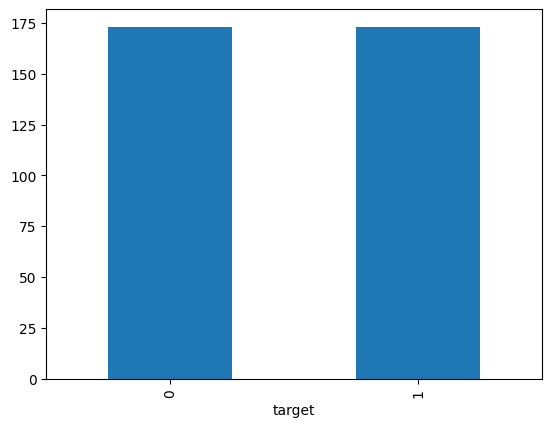

In [9]:
con = Counter(y_train)
print('Przed',con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
con1 = Counter(y_train_sm)
print('Po', con1)
pd.Series(y_train_sm).value_counts().plot.bar()

Przygotowanie modelu

In [10]:
# PARAMS 
model_LR = LogisticRegression(                          #LR dla niezbalansowanych   
    random_state = 0,
    max_iter=250
    )                              
model_LR_SMOTE = LogisticRegression(                    #LR dla zbalansowanych   
    random_state = 0,
    max_iter=100
    )    
model_RF = RandomForestClassifier(                      #random forest dla niezbalansowanych
    n_estimators=20,
    max_depth=6,
    #min_samples_split=5,      
    min_samples_leaf=1,       
    #max_features='sqrt',      
    #class_weight='balanced',  
    random_state=0,          
    #bootstrap=True
    )                     
model_RF_SMOTE = RandomForestClassifier(                 #random forest dla zbalansowanych
    n_estimators=20,
    max_depth=6,
    #min_samples_split=5,      
    min_samples_leaf=1,       
    #max_features='sqrt',      
    #class_weight='balanced',  
    random_state=0,          
    #bootstrap=True
    )   
model_DT = DecisionTreeClassifier(                      #decision tree dla niezbalansowanych
    max_depth=6,
    min_samples_leaf=1,
    random_state=10
    )                     
model_DT_SMOTE = DecisionTreeClassifier(                #decision tree dla zbalansowanych
    max_depth=6,
    min_samples_leaf=1,
    random_state=10
    ) 
model_XGB = XGBClassifier(                              #xgboost dla niezbalansowanych
    max_depth = 4,
    subsample = 0.6
)  
model_XGB_SMOTE = XGBClassifier(                        #xgboost dla zbalansowanych
    max_depth = 4,
    subsample = 0.5
)
model_XGB_RF = XGBRFClassifier(                         # xgboost rf dla niezbalansowanych
    n_estimators = 20,
    max_depth = 4,
    subsample = 0.9,
    random_state = 10
)   
model_XGB_RF_SMOTE = XGBRFClassifier(                   # xgboost rf dla zbalansowanych
    n_estimators = 20,
    max_depth = 4,
    subsample = 1,
    random_state = 0
)          

# MODEL + TRENING
model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm,y_train_sm)
model_RF.fit(X_train,y_train)
model_RF_SMOTE.fit(X_train_sm,y_train_sm)
model_DT.fit(X_train,y_train)
model_DT_SMOTE.fit(X_train_sm,y_train_sm)
model_XGB.fit(X_train, y_train)
model_XGB_SMOTE.fit(X_train_sm,y_train_sm)
model_XGB_RF.fit(X_train,y_train)
model_XGB_RF_SMOTE.fit(X_train_sm,y_train_sm)


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=20, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=0, reg_alpha=None, ...)

### Dobor parametrow przy pomocy GridSerach PC BOOM BOOM

In [ ]:
"""
# PARAMS to Search
params_LR = {                               # dla LR
    #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
    'max_iter':[100,500,1000]               # ilosc iteracji
}

params_DT = {                               # dla DT
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
    'min_samples_leaf':[1,2]                # minimalna ilosc probek lisci
}

params_RF = {
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
}

params_XGB = {                              # dla XGBoost
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

params_XGB_RF = {                           # dla XGBoost RF
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[0,10,20,30,40]          # ustalona losowość dla powtarzalności
}

# All models Search

# analiza dla poszczegolnych celów
goal = ["precision", "recall", "f1", "accuracy"]      #najlepsze parametryd dla wybranej metryki ('recall','f1','precision','accuracy')

for score_1 in zip(goal):
    model_LR = GridSearchCV(model_LR,param_grid=params_LR,scoring=score_1).fit(X_train,y_train)
    model_LR_SMOTE = GridSearchCV(model_LR_SMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_sm,y_train_sm)
    model_DT = GridSearchCV(model_DT,param_grid=params_DT,scoring=score_1).fit(X_train,y_train)
    model_DT_SMOTE = GridSearchCV(model_DT_SMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_sm,y_train_sm)
    model_RF = GridSearchCV(model_RF,param_grid=params_RF,scoring=score_1).fit(X_train,y_train)
    model_RF_SMOTE = GridSearchCV(model_RF_SMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_sm,y_train_sm)
    model_XGB = GridSearchCV(model_XGB,params_XGB,scoring=score_1).fit(X_train,y_train)
    model_XGB_SMOTE = GridSearchCV(model_XGB_SMOTE,params_XGB,scoring=score_1).fit(X_train_sm,y_train_sm)
    model_XGB_RF = GridSearchCV(model_XGB_RF,params_XGB_RF,scoring=score_1).fit(X_train,y_train)
    model_XGB_RF_SMOTE = GridSearchCV(model_XGB_RF_SMOTE,params_XGB_RF,scoring=score_1).fit(X_train_sm,y_train_sm)

    
    print(f'Goal: {score_1}')
    print(f'Best parameters for {score_1} & LR :', model_LR.best_params_)
    print(f'Best score for {score_1} & LR:', model_LR.best_score_)
    print(f'Best parameters for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_params_)
    print(f'Best score for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & RF + SMOTE:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF + SMOTE:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & DT:', model_DT.best_params_)
    print(f'Best score for {score_1} & DT:', model_DT.best_score_)
    print(f'Best parameters for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_params_)
    print(f'Best score for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_score_) 
    print(f'Best parameters for {score_1} & XGBoost:', model_XGB.best_params_)
    print(f'Best score for {score_1} & XGBoost:', model_XGB.best_score_)
    print(f'Best parameters for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF:', model_XGB_RF.best_params_)
    print(f'Best score for {score_1} & XGBoost RF:', model_XGB_RF.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_score_)   """


# One model Search

params_XGB = {                           # dla XGBoost RF
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

model_XGB = GridSearchCV(model_XGB,params_XGB,scoring="precision").fit(X_train,y_train)
model_XGB_SMOTE1 = GridSearchCV(model_XGB_SMOTE,params_XGB,scoring="precision").fit(X_train_sm,y_train_sm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_XGB_SMOTE1.best_params_)
print('Best score XGBoost + SMOTE:', model_XGB_SMOTE1.best_score_)
model_XGB = GridSearchCV(model_XGB_RF,params_XGB,scoring="accuracy").fit(X_train,y_train)
model_XGB_SMOTE2 = GridSearchCV(model_XGB_RF_SMOTE,params_XGB,scoring="accuracy").fit(X_train_sm,y_train_sm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_XGB_SMOTE2.best_params_)
print('Best score XGBoost + SMOTE:', model_XGB_SMOTE2.best_score_)
model_XGB = GridSearchCV(model_XGB_RF,params_XGB,scoring="f1").fit(X_train,y_train)
model_XGB_SMOTE3 = GridSearchCV(model_XGB_RF_SMOTE,params_XGB,scoring="f1").fit(X_train_sm,y_train_sm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_XGB_SMOTE3.best_params_)
print('Best score XGBoost + SMOTE:', model_XGB_SMOTE3.best_score_)
model_XGB = GridSearchCV(model_XGB_RF,params_XGB,scoring="recall").fit(X_train,y_train)
model_XGB_SMOTE4 = GridSearchCV(model_XGB_RF_SMOTE,params_XGB,scoring="recall").fit(X_train_sm,y_train_sm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_XGB_SMOTE4.best_params_)
print('Best score XGBoost + SMOTE:', model_XGB_SMOTE4.best_score_)


Best parameters XGBoost: {'max_depth': 4, 'subsample': 0.6}
Best score XGBoost: 0.9833333333333332
Best parameters XGBoost + SMOTE: {'max_depth': 4, 'subsample': 0.5}
Best score XGBoost + SMOTE: 0.9944444444444445
Best parameters XGBoost: {'max_depth': 4, 'subsample': 0.6}
Best score XGBoost: 0.9780676328502416
Best parameters XGBoost + SMOTE: {'max_depth': 4, 'subsample': 1}
Best score XGBoost + SMOTE: 0.9913457556935817
Best parameters XGBoost: {'max_depth': 4, 'subsample': 0.6}
Best score XGBoost: 0.9577805383022774
Best parameters XGBoost + SMOTE: {'max_depth': 4, 'subsample': 1}
Best score XGBoost + SMOTE: 0.991299473240046
Best parameters XGBoost: {'max_depth': 4, 'subsample': 0.6}
Best score XGBoost: 1.0
Best parameters XGBoost + SMOTE: {'max_depth': 4, 'subsample': 0.5}
Best score XGBoost + SMOTE: 1.0


## Wyniki:

### Metryki

In [ ]:
#LR
y_pred_LR = model_LR.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR_SMOTE))

#RF
y_pred_RF = model_RF.predict(X_test)
print('RF dla nie zbalansowanych\n', classification_report(y_test, y_pred_RF))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print('RF dla zbalansowanych\n', classification_report(y_test, y_pred_RF_SMOTE))

#DT
y_pred_DT = model_DT.predict(X_test)
print('DT dla nie zbalansowanych\n', classification_report(y_test, y_pred_DT))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print('DT dla zbalansowanych\n', classification_report(y_test, y_pred_DT_SMOTE))

#XGBOOST
y_pred_xgb = model_XGB.predict(X_test)
print('XGBoost dla niezbalansowanych\n', classification_report(y_test, y_pred_xgb))
y_pred_xgb_smote = model_XGB_SMOTE.predict(X_test)
print('XGBoost dla zbalansowanych\n', classification_report(y_test, y_pred_xgb_smote))

#XGBOOST SMOTE
y_pred_xgb_rs = model_XGB_RF.predict(X_test)
print('XGBoost RF dla niezbalansowanych\n', classification_report(y_test, y_pred_xgb_rs))
y_pred_xgb_rs_smote = model_XGB_RF_SMOTE.predict(X_test)
print('XGBoost dla zbalansowanych\n', classification_report(y_test, y_pred_xgb_rs_smote))

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.81      0.93      0.87        14

    accuracy                           0.93        57
   macro avg       0.89      0.93      0.91        57
weighted avg       0.94      0.93      0.93        57

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.93      0.93        14

    accuracy                           0.96        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.96      0.96      0.96        57

RF dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.93      0.93        14

    accuracy                           0.96        57
   macro avg       0.95      0.95      0.95    

### Heatmap

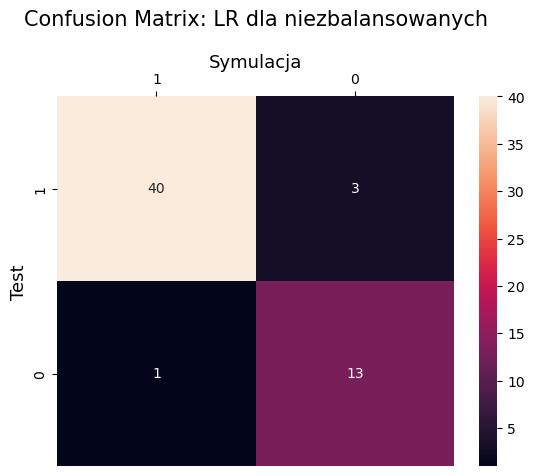

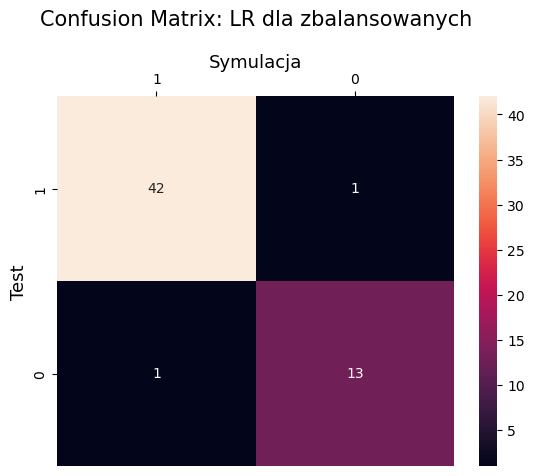

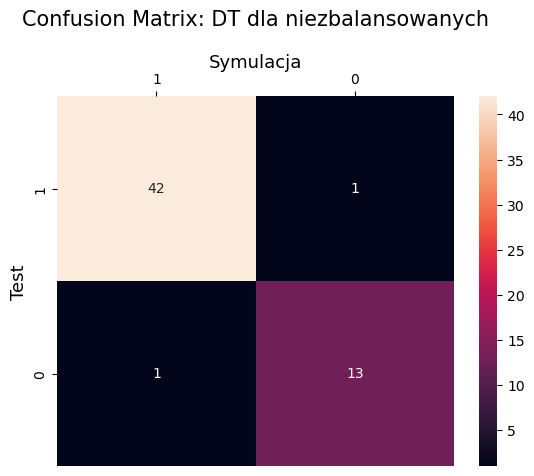

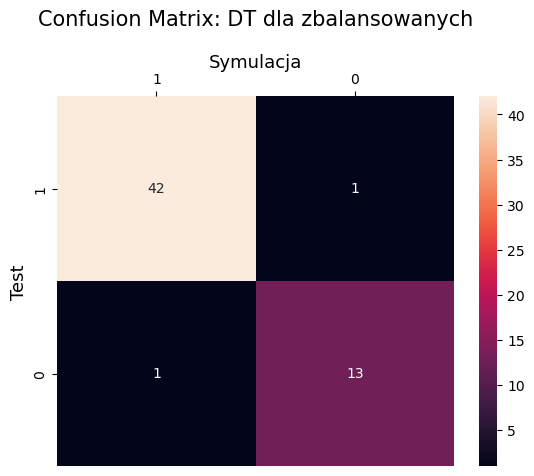

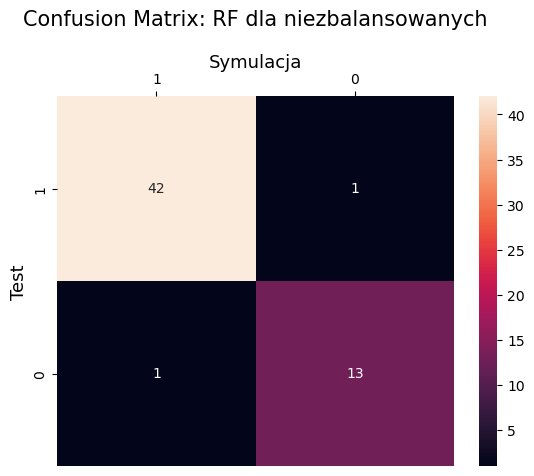

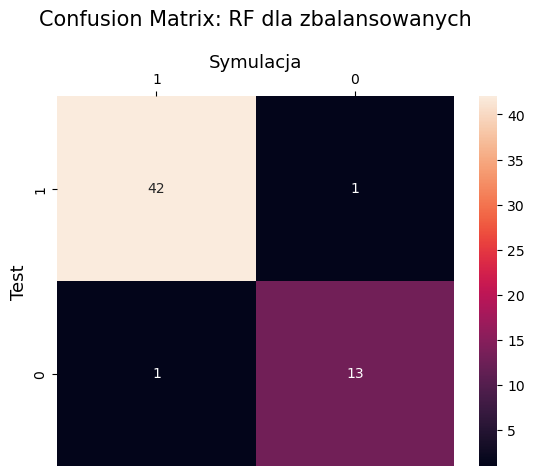

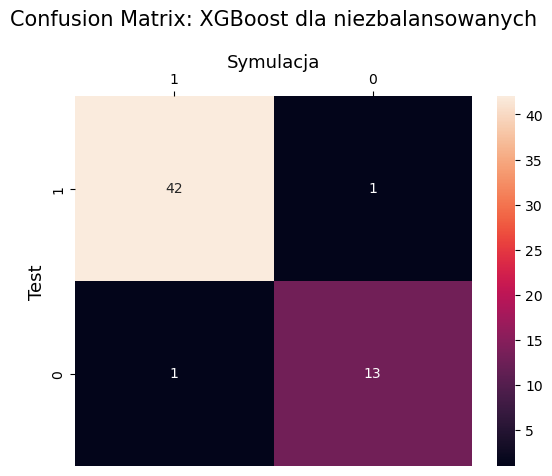

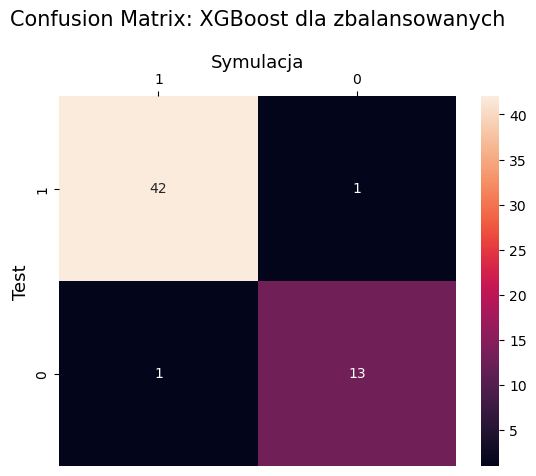

In [ ]:
conf_mat_LR = confusion_matrix(y_test,y_pred_LR)
conf_mat_LR_SMOTE = confusion_matrix(y_test,y_pred_LR_SMOTE)
conf_mat_RF = confusion_matrix(y_test,y_pred_RF)
conf_mat_RF_SMOTE = confusion_matrix(y_test,y_pred_RF_SMOTE)
conf_mat_DT = confusion_matrix(y_test,y_pred_DT)
conf_mat_DT_SMOTE = confusion_matrix(y_test,y_pred_DT_SMOTE)
conf_mat_XGB = confusion_matrix(y_test,y_pred_xgb)
conf_mat_XGB_SMOTE = confusion_matrix(y_test,y_pred_xgb_smote)

conf_matrices = [conf_mat_LR, conf_mat_LR_SMOTE, conf_mat_DT, conf_mat_DT_SMOTE, conf_mat_RF, conf_mat_RF_SMOTE, conf_mat_XGB, conf_mat_XGB_SMOTE]
model_names = ['LR dla niezbalansowanych', 'LR dla zbalansowanych', 'DT dla niezbalansowanych', 'DT dla zbalansowanych', 'RF dla niezbalansowanych', 'RF dla zbalansowanych', 'XGBoost dla niezbalansowanych', 'XGBoost dla zbalansowanych']
for conf_mat, model_name in zip(conf_matrices,model_names):
    sns.heatmap(conf_mat, annot=True,xticklabels=['1','0'],yticklabels=['1','0'])
    plt.ylabel('Test',fontsize=13)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('Symulacja',fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.show()


### Drzewa decyzyjne

In [ ]:
#TREE dla DT
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=800)
tree.plot_tree(model_DT, feature_names=dtrain.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with unbalanced data")
#fig.savefig('../reports/Results/tree/tree_DT_1.png')

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=800)
plot_tree(model_DT_SMOTE, feature_names=dtrain.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with balanced data")
#fig.savefig('../reports/Results/tree/tree_DT_SMOTE_1.png')

#TREE dla RF
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=800)
tree.plot_tree(model_RF.estimators_[0], 
               feature_names=dtrain.columns.tolist(),
               filled = True,  
               fontsize=10)
plt.title("First Decision Tree from Random Forest with unbalanced data")
#fig.savefig('../reports/Results/tree/tree_RF.png')

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=800)
tree.plot_tree(model_RF_SMOTE.estimators_[0], 
               feature_names=dtrain.columns.tolist(),
               filled = True,  
               fontsize=10)
plt.title("First Decision Tree from Random Forest with balanced data")
#fig.savefig('../reports/Results/tree/tree_RF_SMOTE.png')

#PC boom boom
""" fig, axes = plt.subplots(nrows = 1,ncols = 20,figsize = (60,10), dpi=900)
for index in range(0, 20):
    tree.plot_tree(model_RF.estimators_[index],
                   feature_names=dtrain.columns.tolist(), 
                   filled = True,
                   ax = axes[index],
                   fontsize=4)

    axes[index].set_title('Estimator: ' + str(index), fontsize = 10)
fig.savefig('../reports/Results/tree/tree_1_RF7.png') """

" fig, axes = plt.subplots(nrows = 1,ncols = 20,figsize = (60,10), dpi=900)\nfor index in range(0, 20):\n    tree.plot_tree(model_RF.estimators_[index],\n                   feature_names=dtrain.columns.tolist(), \n                   filled = True,\n                   ax = axes[index],\n                   fontsize=4)\n\n    axes[index].set_title('Estimator: ' + str(index), fontsize = 10)\nfig.savefig('../reports/Results/tree/tree_1_RF7.png') "